## Chi-Square Analysis

### First Question: Did more women and children suvive compared to men?

#### Dataset from Canvas (Titanic Passenger List.csv)

In [1]:
import pandas as pd

passenger_df = pd.read_csv('../data/titanic_passengers.csv')

passenger_df.head()

,Name,Born,Died,Age,Gender,Passenger_Class,Lived_Died,Fare,Fare_decimal
0,"DEAN, Miss Elizabeth Gladys Millvina",1912.0,2009.0,0.166667,Female,3,lived,£20 11s 6d,20.58
1,"DANBOM, Master Gilbert Sigvard Emanuel",1911.0,1912.0,0.333333,Male,3,died,£14 8s,14.40
2,"TANNūS, Master As'ad",1911.0,1931.0,0.416667,Male,3,lived,£8 10s 4d,8.52
3,"PEACOCK, Master Albert Edward",1911.0,1912.0,0.583333,Male,3,died,£13 15s 6d,13.78
4,"RICHARDS, Master Sibley George",1911.0,1987.0,0.750000,Male,2,lived,£18 15s,18.75


- What kind of data is the `dependent` variable? 
    - Ordinal
- What kind of data is the `independent` (gender) variable? 
    - Nominal 


    - `Ordinal` data. Data that can be ordered 
    - `Categorical/nominal` data. Data that can not be ordered

In [2]:
# Create contingency table
# NOTE: Margins = True will show the summary statistics
contingency_table = pd.crosstab(passenger_df['Gender'], passenger_df['Lived_Died'])

contingency_table

Lived_Died,died,lived
Gender,,
Female,143,339
Male,709,161


Text(0, 0.5, 'Count')

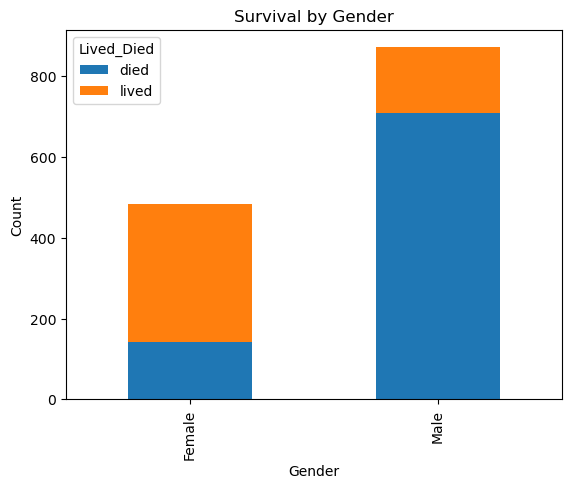

In [3]:
# Create a stacked bar chart of the contingency table
import matplotlib.pyplot as plt

# exlude the last column and rwo which are the margins (summary statistics)
contingency_table.plot(kind='bar', stacked=True)

# Give it a titile and label the axes
plt.title('Survival by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')

In [4]:
# Print the Chi Squared analysis
from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f'Chi Square Value: {chi2}')
print(f'P-Value: {p}')
print(f'Degrees of Freedom: {dof}')
print(f'Expected Frequencies Table: \n{expected}')


# NOTE: With the Chi Square test, we are testing the null hypothesis that the two variables are independent
# You get 4 values back: 
# 1. The Chi Square value: The higher the value, the more likely the variables are dependent
# 2. The target p-value: The lower the value, the more likely the variables are dependent
# 3. The degrees of freedom: The number of values that are free to vary
# 4. Expected Frequencies Table: The expected values if the variables were independent


Chi Square Value: 355.24355436145913
P-Value: 3.0570688722545846e-79
Degrees of Freedom: 1
Expected Frequencies Table: 
[[303.74556213 178.25443787]
 [548.25443787 321.74556213]]


### Chi-Square Example: Was Age Relevant? 

In [12]:
# Cut the age column into bins for every 10 years
# Create the bins
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]

# Create the labels
labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80']

# Create the new column
passenger_df['Age_Group'] = pd.cut(passenger_df['Age'], bins=bins, labels=labels)

# Create the contingency table
contingency_table = pd.crosstab(passenger_df['Age_Group'], passenger_df['Lived_Died'])

contingency_table
print(f'Chi2-Stats for Age Group:\n{chi2_contingency(contingency_table)}')

Chi2-Stats for Age Group:
Chi2ContingencyResult(statistic=24.465546982751874, pvalue=0.0009433264132943268, dof=7, expected_freq=array([[ 62.4246988 ,  37.5753012 ],
       [141.70406627,  85.29593373],
       [282.15963855, 169.84036145],
       [165.42545181,  99.57454819],
       [109.24322289,  65.75677711],
       [ 43.69728916,  26.30271084],
       [ 21.22439759,  12.77560241],
       [  3.12123494,   1.87876506]]))


<Axes: xlabel='Age_Group'>

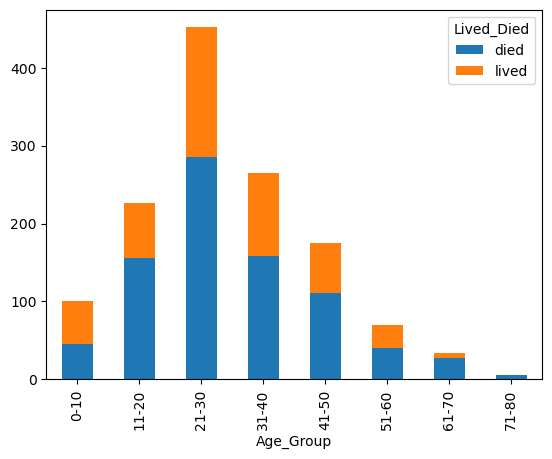

In [13]:
# Plot the contingency table
contingency_table.plot(kind='bar', stacked=True)

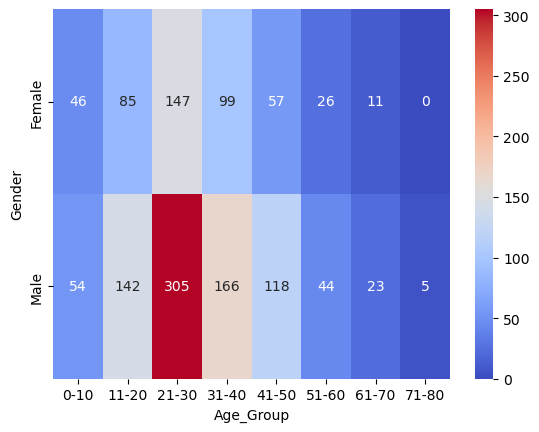

In [36]:
# Show the heatmap of age_group and lived_died

# Create the contingency table
contingency_table = pd.crosstab(passenger_df['Gender'], passenger_df['Age_Group'] )

# Plot the heatmap
import seaborn as sns

sns.heatmap(contingency_table, annot=True, fmt='d', cmap='coolwarm')

plt.show()
